In [18]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

___
Enter Team Member Names here (double click to edit):

- Name 1:
- Name 2:
- Name 3:

________

# In Class Assignment Five
In the following assignment you will be asked to fill in python code and derivations for a number of different problems. Please read all instructions carefully and turn in the rendered notebook (or HTML of the rendered notebook) before the end of class. Be sure to save the notebook before uploading.

<a id="top"></a>
## Contents
* <a href="#testing">Testing R Magics</a>
* <a href="#understand">Understanding the Data Representation</a>
* <a href="#apriori">Finding Frequent Items</a>

** The following will be available during live session: **
* <a href="#candidates">Generating Candidates</a>
* <a href="#arules">Using ARules and ARulesViz</a>

________________________________________________________________________________________________________

<a id="testing"></a>
<a href="#top">Back to Top</a>

## Running in the 'R' Kernel
In the Jupyter Notebook menu, Go to Kernel > Change Kernel and select 'R'

Warning message:
"package 'arules' was built under R version 3.6.1"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.1"
Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Warning message:
"package 'arulesViz' was built under R version 3.6.1"Loading required package: grid
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 110 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[10 item(s), 2201 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [49 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


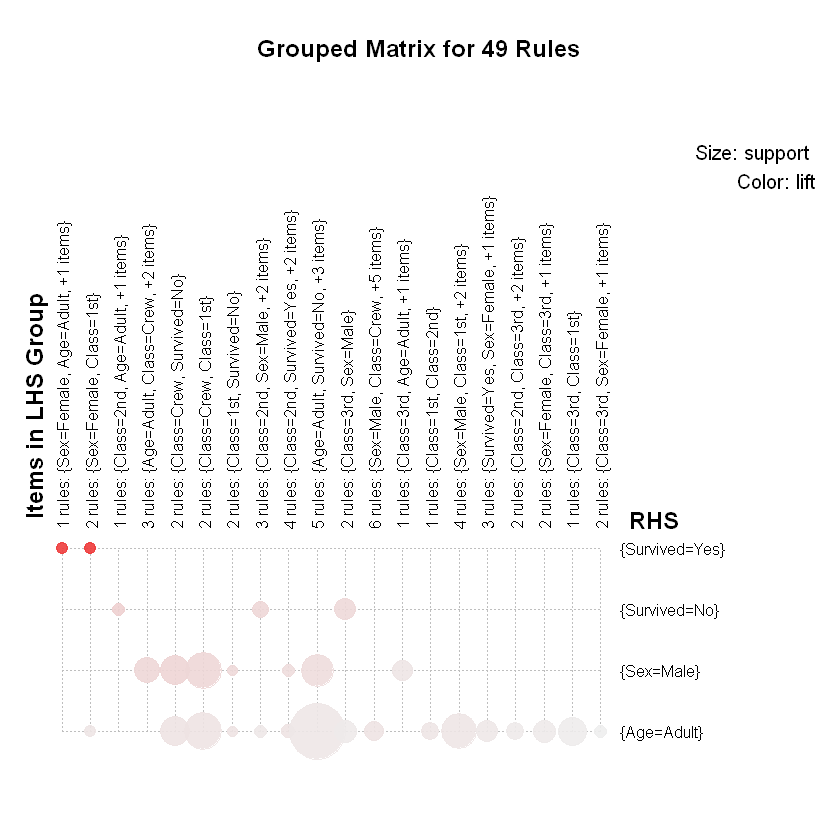

In [2]:
library('arules')
library('arulesViz')

load('titanic2.raw.rdata')
rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.05, conf=0.8))
rules.sorted <- sort(rules, by='lift')
plot(rules.sorted, method='grouped') 

___
<a id="understand"></a>
<a href="#top">Back to Top</a>
## Understanding the dataset
We have used the titanic dataset before in class, however this dataset has been pruned to only include the social class, sex, age (as a nominal), and if the individual survived. The data can be stored in many ways, but is stored here as a table of values. 

**Question**: Is this dataset a typical example of *transaction* data (*i.e.*, like the grocery store transaction data)? Why or Why not? What makes it similar or different? **Hint**: think about the possible itemset lattice and how it might be different/similar. What makes an item in this dataset?

___
Enter your answer here:

*Double Click to Edit*



___

## Running in the Python 3 Kernel
In the Jupyter Notebook menu, Go to Kernel > Change Kernel and select 'Python 3'

<a id="apriori"></a>
<a href="#top">Back to Top</a>
## Frequent Itemsets and Apriori
Run the following code to look at 3 and 4-itemsets in the Titanic dataset.

In [1]:
# getting things started
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('titanic_raw.csv',index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
Class       2201 non-null object
Sex         2201 non-null object
Age         2201 non-null object
Survived    2201 non-null object
dtypes: object(4)
memory usage: 68.9+ KB


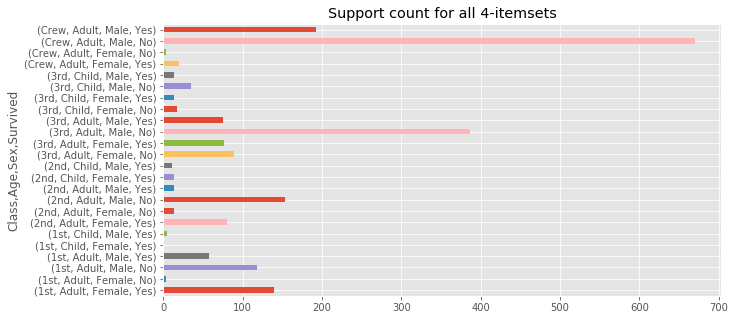

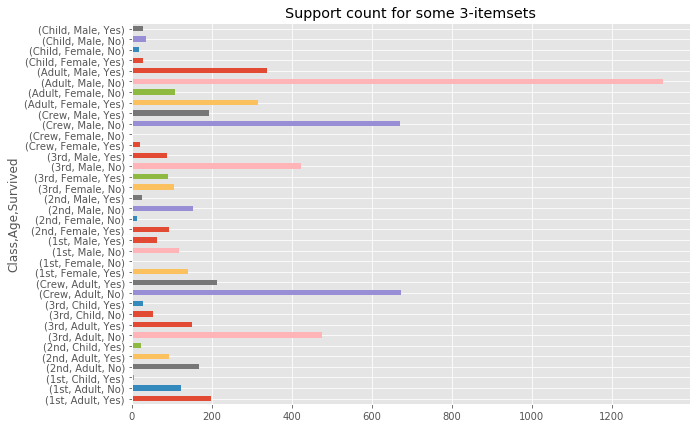

In [3]:
plt.style.use('ggplot')

# Now lets plot the number of times each itemset occurs graphically
# find counts of the four itemsets
f = plt.figure(figsize=(10,5))
df_grouped = df.groupby(by=['Class','Age','Sex'])
ax = df_grouped.Survived.value_counts().plot(kind='barh')
plt.title('Support count for all 4-itemsets')
plt.show()

#Plot 3-itemsets
df_grouped = df.groupby(by=['Class','Age'])
countsA = df_grouped.Survived.value_counts() #.reset_index(name='Counts')
df_grouped = df.groupby(by=['Class','Sex'])
countsB = df_grouped.Survived.value_counts() #.reset_index(name='Counts')
df_grouped = df.groupby(by=['Age','Sex'])
countsC = df_grouped.Survived.value_counts() #.reset_index(name='Counts')

df = pd.concat((countsA,countsB,countsC)).plot(kind='barh', figsize=(10,7), title='Support count for some 3-itemsets')

Use the graphs above to estimate the values for the following quantities. You do not need to calculate counts from the dataset, just try to get close by viewing from the graph. Recall that for a given rule, $X\rightarrow Y$, the confidence is given by 
$$c=\frac{\sigma( X \cup Y)}{\sigma( X )} $$

**Questions**: Given the graphs above, what is the support count, $\sigma$, and support, $s$, for the itemset {1st, Adult, Yes}? What about the itemset {1st, Adult, Yes, Female}?

**Question**: What is the confidence, $c$, for the rule {1st, Adult, Yes} $\rightarrow$ {Female}? 

___
Enter your answer here:

*Double Click to Edit*




In [1]:
# Insert any calculations needed to answer the above question here



___
**Question**: What is the support count (an integer) for a *minsup* threshold of 0.25? Using the support count graphs above, which itemsets would be considered frequent with a *minsup* of 0.25? Are any of the 4-itemsets also maximal for this value of *minsup*? Why or Why not?

___
Enter your answer here:

*Double Click to Edit*




In [2]:
# Insert any calculations needed to answer the above question here
